# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Malus-with-two-polarizers" data-toc-modified-id="Malus-with-two-polarizers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Malus with two polarizers</a></div><div class="lev2 toc-item"><a href="#Motors-definition" data-toc-modified-id="Motors-definition-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motors definition</a></div><div class="lev2 toc-item"><a href="#Labjack-definition" data-toc-modified-id="Labjack-definition-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Labjack definition</a></div><div class="lev2 toc-item"><a href="#Experimental-determination-of-I0-intensity" data-toc-modified-id="Experimental-determination-of-I0-intensity-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Experimental determination of I0 intensity</a></div><div class="lev2 toc-item"><a href="#Experimental-determination-of-Malus-Law" data-toc-modified-id="Experimental-determination-of-Malus-Law-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Experimental determination of Malus Law</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Analysis-of-results" data-toc-modified-id="Analysis-of-results-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Analysis of results</a></div><div class="lev3 toc-item"><a href="#Go-to-Maximum-intensity-position" data-toc-modified-id="Go-to-Maximum-intensity-position-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Go to Maximum intensity position</a></div><div class="lev3 toc-item"><a href="#Go-to-Minimum-intensity-position" data-toc-modified-id="Go-to-Minimum-intensity-position-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Go to Minimum intensity position</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev2 toc-item"><a href="#Final:-Close" data-toc-modified-id="Final:-Close-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Final: Close</a></div><div class="lev2 toc-item"><a href="#TO-DO" data-toc-modified-id="TO-DO-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>TO DO</a></div>

# Malus with two polarizers

Author: Luis Miguel Sanchez Brea

Date:   17/01/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 314 mA)
We have lens for collimating and Thorlabs DG10-600-B diffuser

We have polarizer 1 Thorlabs LPNIRE100-B
We have polarizer 4 Thorlabs LPNIRE100-B

Polarizer 1 is placed at 0º, arbitrarily

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

\begin{equation}
P_L(0)=\left[\begin{array}{cc}
p_1 & 0  \\
0 & p_2
\end{array}\right]
\end{equation}

After this formalism, we pass to Mueller using Jones-Mueller Transformation 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from __future__ import print_function

## Motors definition

In [3]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels = [600, 600, 600, 600]

70.306


In [4]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



## Labjack definition

In [5]:
import u3
import LabJackPython


V=1.
mV=V/1000

In [6]:
def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [7]:
# loads labjack
d=u3.U3()

In [8]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint.pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [9]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


-0.0192288074177


In [10]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.2f}".format(ainValue), end=', ')
    return ainValue

## Experimental determination of I0 intensity
Remove polarizers and determine maximum intensity.
No background illumination

18/02/14 - Current 0.329 A,   Voltaje 2.41 V
         - Amplification = 20
         - result I0 = 7.25 V

In [12]:
I0=get_intensity(verbose=True)

0.16, 

## Experimental determination of Malus Law
Place Polarizer P1 and P4.

Polarizers P2 and P3 are not in experiment

Same conditions than previously. No background illumination


Moves polarizer P4 360º

In [28]:
# Move motor 1 to maximum position of laser diode
Vels=[50,50,50,50]

motors.move(
        positions=[0, 0, 0, 0], velocities=Vels, verbose=False)
motors.get_position()
get_intensity(verbose=True)


current positions = ([ 0.], [ 0.], [ 0.], [ 0.])
0.15, 

0.14962712419219315

In [29]:
positions=sp.linspace(0,360,90)
intensities=sp.zeros_like(positions,dtype=float)

In [30]:
for i, position_4 in enumerate(positions):
    motors.move(
        positions=[0, 0,  0, position_4], velocities=Vels, verbose=False)
    intensities[i]=get_intensity(verbose=True)


0.15, 0.21, 0.27, 0.35, 0.42, 0.51, 0.58, 0.67, 0.75, 0.83, 0.91, 0.97, 1.04, 1.09, 1.14, 1.17, 1.19, 1.20, 1.20, 1.19, 1.16, 1.13, 1.08, 1.02, 0.96, 0.89, 0.81, 0.73, 0.65, 0.57, 0.48, 0.41, 0.33, 0.26, 0.20, 0.14, 0.09, 0.06, 0.03, 0.02, 0.02, 0.03, 0.05, 0.08, 0.13, 0.18, 0.24, 0.31, 0.38, 0.47, 0.54, 0.63, 0.71, 0.79, 0.87, 0.94, 1.01, 1.07, 1.12, 1.15, 1.18, 1.19, 1.20, 1.19, 1.17, 1.14, 1.11, 1.05, 0.99, 0.93, 0.86, 0.77, 0.69, 0.61, 0.53, 0.45, 0.37, 0.29, 0.23, 0.17, 0.12, 0.07, 0.05, 0.03, 0.02, 0.02, 0.04, 0.06, 0.10, 0.15, 

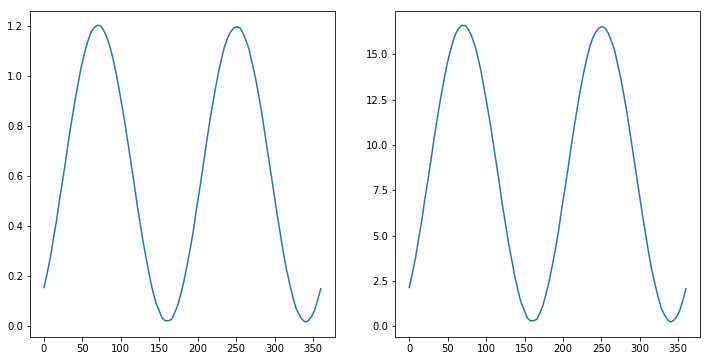

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(positions, intensities)
plt.subplot(122)
plt.plot(positions, intensities/I0*100)
plt.show()

## Fitting data to sine

Fit examples with sinusoidal functions

In [35]:
from scipy import optimize

In [36]:
# Fit the first set
fitfunc = lambda p, x: p[0]+p[1]*np.cos(2*np.pi/p[2]*(x-p[3])) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function


In [37]:
p0 = [1.25,2.5, 180, 0.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(positions, intensities))

if p1[1]<0:
    p_changed=[p1[0], -p1[1], p1[2], p1[3]+90]
    p1=p_changed

y_fitting=fitfunc(p1, positions)
residuals=intensities-y_fitting


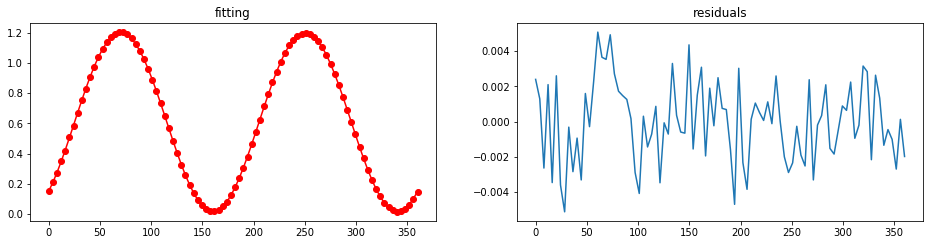

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(positions, intensities, "ro")
plt.plot(positions,y_fitting , "r-") # Plot of the data and the fit

#p_changed=[p1[0], -p1[1], p1[2], p1[3]+90]
#y_fitting_changed=fitfunc(p_changed, positions)
#plt.plot(positions, y_fitting_changed, 'g')

plt.title('fitting')

plt.subplot(2,2,2)
plt.plot(positions, residuals)
plt.title('residuals')
plt.show()

In [39]:
print(p1)
print(sp.std(residuals))

[0.60941646291967666, 0.59159311079947596, 180.02758479032815, 70.305555869094547]
0.0022851062668


## Analysis of results

In [40]:
angle4_max=p1[3]
min_light=p1[0]-p1[1]
max_light=p1[0]+p1[1]

print("angle = {:4.5}º, min_intensity = {:4.5} V, max_intensity ={:4.5}".format(angle4_max, min_light, max_light))
print("intensities: min = {:4.5} V, max = {:4.5} V".format(intensities.min(), intensities.max()))

angle = 70.306º, min_intensity = 0.017823 V, max_intensity =1.201
intensities: min = 0.016589 V, max = 1.2037 V


### Go to Maximum intensity position

In [41]:
motors.move(
        positions=[0, 0, 0, angle4_max], velocities=Vels, verbose=False)
motors.get_position()
get_intensity(verbose=True)

current positions = ([ 0.], [ 0.], [ 0.], [ 70.313])
1.20, 

1.198580638738349

### Go to Minimum intensity position

In [42]:
motors.move(
        positions=[0, 0, 0, angle4_max+90], velocities=Vels, verbose=False)
motors.get_position()
get_intensity(verbose=True)

current positions = ([ 0.], [ 0.], [ 0.], [ 160.313])
0.02, 

0.02170596388168633

## Calibration parameters

In [51]:
Imin=min_light
Imax=max_light
I0 = I0

p0=((Imax-sp.sqrt(Imax**2-Imin**2))/I0)**(0.25)
p1=p0*sp.sqrt((Imax+sp.sqrt(Imax**2-Imin**2))/Imin)
print(p0, p1)

0.0653499037607 0.758623923874


18/02/14 - 
   - **p0 = 0.0653499037607, p1 = 0.758623923874, theta_4= 70.306º**
   - std adjustement to fit: 0.0022851062668 V = 0.19% 

## Final: Close

In [14]:
motors.close()
del motors

NameError: name 'motors' is not defined

In [16]:
LabJackPython.Close()
del LabJackPython

NameError: name 'LabJackPython' is not defined

## TO DO

* if p[1]<0 change sign and add 90º